In [1]:
%matplotlib inline

import numpy as np

import matplotlib.pyplot as plt

# list of neighbors for each square
neighbors =  [[1, 4, 0, 0], [2, 5, 0, 1], [3, 6, 1, 2], [3, 7, 2, 3],
             [5, 8, 4, 0], [6, 9, 4, 1], [7, 10, 5, 2], [7, 11, 6, 3],
             [9, 12, 8, 4], [10, 13, 8, 5], [11, 14, 9, 6], [11, 15, 10, 7],
             [13, 12, 12, 8], [14, 13, 12, 9], [15, 14, 13, 10], [15, 15, 14, 11]]

# initialize transfer matrix to zeroes
n = 4
transfer_matrix = np.zeros((n*n, n*n))

# now fill in transfer matrix with transfer probabilities
for i in range(n*n):
    for neighbor in range(4):
        transfer_matrix[neighbors[i][neighbor], i] += 0.25

# make sure transfer matrix is (at least somewhat) correct
for row in transfer_matrix:
    assert(np.sum(row)) == 1.0 

Now find the equilibrium probability vector, which is the eigenvector of the transfer matrix with eigenvalue 1.

Use `np.where` to find where the eigenvalue is (very close to) 1, and then the eigenvector associated with that eigenvalue is just `eigenvectors[:, eigenvalue_1]`

In [2]:
# find equilibrium probability vector
# this is the eigenvector associated with eigenvalue 1
eigenvalues, eigenvectors = np.linalg.eig(transfer_matrix)
eigenvalue_1 = np.where(np.abs(np.abs(eigenvalues) - 1.0) < 1e-8)[0][0]
print np.abs(eigenvectors[:, eigenvalue_1])

[ 0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25
  0.25  0.25  0.25  0.25]


So I have 2 questions:
1. Why are there nonzero imaginary parts of the eigenvectors and eigenvalues?
1. Why is the eigenvector associated with eigenvalue 1 all 0.25, when it should clearly be 1/16?

Clearly, the behavior in time is correct, as shown by the plot below.

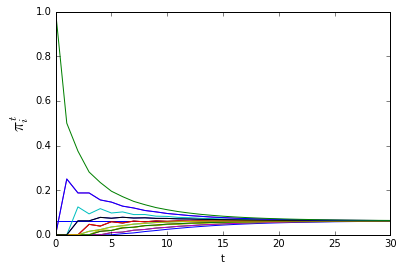

In [10]:
# empty list for positions through time
positions_t = []

# positions at time 0 (start at top right square)
position = np.zeros(n*n)
position[-1] = 1

# now loop through time and find the probability vector at time t
for step in range(100):
    # print position
    positions_t.append(position)
    position = np.dot(transfer_matrix, position)
positions_t = np.asarray(positions_t)
fig, ax = plt.subplots()
ax.axhline(1.0/16)
ax.set_xlabel('t')
ax.set_ylabel('$\pi_i^t$', size='xx-large')
for p_square_t in positions_t.T:
    ax.plot(p_square_t[:31])
fig.savefig('figures/pebble_4x4.pdf')